# Test Models For Rice Image Classification CNN TensorFlow


- This script contains test models designed to explore the optimization process and document iterative changes in model architecture and performance.

### Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#  Generate a DataFrame for Image Files and Their Labels

In [2]:
from pathlib import Path

#dataset_dir = Path("path/to/dataset")
dataset_dir = Path("Resources/Rice_Image_Dataset")
classes = [d.name for d in dataset_dir.iterdir() if d.is_dir()]
#classes.remove('Rice_Citation_Request.txt')
num_classes = len(classes)

image_count = len(list(dataset_dir.glob('*/*.jpg')))
print(f'Total images: {image_count}')
print(f"Number of classes: {num_classes}")
print("Classes:", classes)

Total images: 75000
Number of classes: 5
Classes: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


#  Generate a DataFrame for Image Files and Their Labels

In [3]:
# Define the base directory
base_dir = 'Resources/Rice_Image_Dataset'

# Initialize a list to hold image paths and labels
data = []

# Loop through each class folder in the base directory
# Check if it's a directory and append the file path and class label
for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, img_file)
            data.append([file_path, class_name])

# Creating a DataFrame from the collected data
df = pd.DataFrame(data, columns=['Image', 'Label'])

# Displaying the first few rows
print(df.head())

                                               Image    Label
0  Resources/Rice_Image_Dataset\Arborio\Arborio (...  Arborio
1  Resources/Rice_Image_Dataset\Arborio\Arborio (...  Arborio
2  Resources/Rice_Image_Dataset\Arborio\Arborio (...  Arborio
3  Resources/Rice_Image_Dataset\Arborio\Arborio (...  Arborio
4  Resources/Rice_Image_Dataset\Arborio\Arborio (...  Arborio


#   Exploring Dataset Distribution by Class

In [4]:
# Defining the dataset directory
dataset_dir = 'Resources/Rice_Image_Dataset'

# Initializing the lists to store class names and their corresponding image counts
images_per_class = []
all_classes = []

# Loop through each class folder
# Ensure it's a directory
# Counting the number of images in the folder
# Appending the image count and class name
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        total_images = len(os.listdir(class_dir))
        images_per_class.append(total_images) 
        all_classes.append(class_name)
        print(f'{class_name.capitalize()}: contains {total_images} images')



Arborio: contains 15000 images
Basmati: contains 15000 images
Ipsala: contains 15000 images
Jasmine: contains 15000 images
Karacadag: contains 15000 images


In [5]:
# Data generator with preprocessing
# Normalizing the pixel values to [0, 1]
datagen = ImageDataGenerator(rescale=1.0/255)

# Loading the data
# Resizing images to 224x224
# Number of images per batch
data_generator = datagen.flow_from_directory(
    'Resources/Rice_Image_Dataset',  # Path to the dataset
    target_size=(224, 224), 
    batch_size=32,
    # Multi-class classification
    class_mode='categorical'  
)

Found 75000 images belonging to 5 classes.


#   Distribution of Images in DataSet

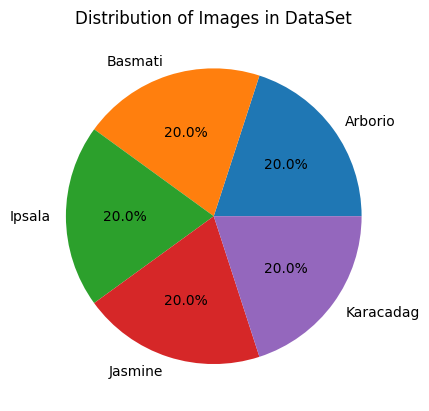

In [6]:
# Creating a pie chart to display the distribution of images in the Dataset
plt.pie(images_per_class, labels=all_classes, autopct='%1.1f%%')
plt.title('Distribution of Images in DataSet')
plt.show()

#  CNN Model 

# Test Model 1

- Step 1: Define the Data Generators

In [ ]:
# Defining the data generators and creating them with a 50-50 split for training and validation.
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.5)

# Generate validation data from the dataset 
train_generator = datagen.flow_from_directory(
    # Path to dataset
    # Resizing the images to 32x32 pixels for faster computation
    # No shuffling required for maintaining consistency in tests
    'Resources/Rice_Image_Dataset',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=False
)

# Generating the validation data from the dataset
# Path to dataset
# Resize images to 32x32 pixels
# No shuffling required for consistent validation
validation_generator = datagen.flow_from_directory(
    'Resources/Rice_Image_Dataset',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 37500 images belonging to 5 classes.
Found 37500 images belonging to 5 classes.


- Step 2: Define the CNN Model

In [ ]:
# Using the simplest CNN architecture designed for quick testing
test1_cnn = Sequential()

# 1: Convolution Layer
# The first convolutional layer with minimal filters and ReLU activation
test1_cnn.add(Conv2D(filters=8, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))

# 2: Pooling Layer
# Max-pooling reduces the spatial dimensions for computational efficiency
test1_cnn.add(MaxPooling2D(pool_size=2, strides=2))

# 3: Flattening Layer
# Converting into a 1D vector for dense layers
test1_cnn.add(Flatten())

# 4: Full connection is a dense layer with Sigmoid activation for non-linear transformation
test1_cnn.add(Dense(units=8, activation='sigmoid'))

# 5: Output layer is the final dense layer with Sigmoid activation for multi-class output
test1_cnn.add(Dense(units=5, activation='sigmoid'))  # Number of classes

# Display Summary
test1_cnn.summary()

c:\Users\manro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │        14,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,677 (57.33 KB)

 Trainable params: 14,677 (57.33 KB)

 Non-trainable params: 0 (0.00 B)

- Step 3: Compile the Model

In [ ]:
# Compile the CNN Model with categorical crossentropy and accuracy as the metric
test1_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- Step 4: Train the Model

In [ ]:
# Train the model with only 4 epochs for faster testing
test1_fit = test1_cnn.fit(
    train_generator,
    epochs=4, 
    validation_data=validation_generator
)

c:\Users\manro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 680s 580ms/step - accuracy: 0.5754 - loss: 1.1849 - val_accuracy: 0.8725 - val_loss: 0.6985
Epoch 2/4
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 33s 28ms/step - accuracy: 0.9484 - loss: 0.4463 - val_accuracy: 0.8791 - val_loss: 0.5617
Epoch 3/4
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 34s 29ms/step - accuracy: 0.9649 - loss: 0.2623 - val_accuracy: 0.8854 - val_loss: 0.5114
Epoch 4/4
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 33s 28ms/step - accuracy: 0.9683 - loss: 0.1737 - val_accuracy: 0.8922 - val_loss: 0.5148


- Step 5: Evaluate and Document Results

In [ ]:
# Extracting the final loss and accuracy from training history
final_train_loss = test1_fit.history['loss'][-1]
final_train_accuracy = test1_fit.history['accuracy'][-1]

# Printing the final results
print(f"Test Model 1 - Final Training Loss: {final_train_loss:.4f}, Accuracy: {final_train_accuracy:.4f}")


Test Model 1 - Final Training Loss: 0.1616, Accuracy: 0.9681


In [14]:
# Save the Simplest CNN Model
test1_cnn.save('test1_cnn_model.h5')
print("Test-1 model saved as 'test1_cnn_model.h5'")

Test-1 model saved as 'test1_cnn_model.h5'


# Test Model 1: Simplest CNN for Testing Purposes
This model serves as a baseline to evaluate the effectiveness of different architectures and hyperparameter combinations. 
For testing purposes the following features were used to create this model.
- **Data Split:** A 50-50% split between training and validation was chosen to evenly test the model's performance.
- **Activation Functions:** `ReLU` was used in the convolutional layers for its efficiency in training, while `Sigmoid` was used in the dense layers for simplicity.
- **Epochs:** Limited to 4 for quick testing without overfitting.
- **Input Size:** Reduced to (32, 32) for faster computation during training.

# Test Model 2

- Step 1: Define the Data Generators

In [ ]:
# Creating data generators with 60% training and 40% validation
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.4) 

# Training data generator
train_generator = datagen.flow_from_directory(
    'Resources/Rice_Image_Dataset',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    'Resources/Rice_Image_Dataset',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 45000 images belonging to 5 classes.
Found 30000 images belonging to 5 classes.


- Step 2: Define the CNN Model

In [ ]:
# Defining the CNN Model with Mixed Activations
test2_cnn = Sequential()

# 1: Convolution layer with sigmoid
test2_cnn.add(Conv2D(filters=16, kernel_size=3, activation='sigmoid', input_shape=(32, 32, 3)))

# 2: Pooling
test2_cnn.add(MaxPooling2D(pool_size=2, strides=2))

# 3: Flattening
test2_cnn.add(Flatten())

# 4: Dense Layer with Sigmoid
test2_cnn.add(Dense(units=32, activation='sigmoid'))

# 5: Output Layer with Softmax
test2_cnn.add(Dense(units=5, activation='softmax')) 

# Display the summary
test2_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │       115,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,845 (452.52 KB)

 Trainable params: 115,845 (452.52 KB)

 Non-trainable params: 0 (0.00 B)

- Step 3: Compile the Model

In [ ]:
# Compiling the CNN Model
test2_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- Step 4: Train the Model

In [ ]:
# Trainning the CNN Model for 6 epochs
test2_fit = test2_cnn.fit(
    train_generator,
    epochs=6, 
    validation_data=validation_generator
)

Epoch 1/6
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.6477 - loss: 1.0583 - val_accuracy: 0.8406 - val_loss: 0.6989
Epoch 2/6
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.9407 - loss: 0.2256 - val_accuracy: 0.8563 - val_loss: 0.6955
Epoch 3/6
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.9569 - loss: 0.1442 - val_accuracy: 0.8644 - val_loss: 0.7589
Epoch 4/6
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.9652 - loss: 0.1121 - val_accuracy: 0.8679 - val_loss: 0.9115
Epoch 5/6
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9700 - loss: 0.0959 - val_accuracy: 0.8674 - val_loss: 0.7344
Epoch 6/6
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.9694 - loss: 0.0943 - val_accuracy: 0.8672 - val_loss: 0.7762


- Step 5: Evaluate and Document Results

In [ ]:
# Extracting the final loss and accuracy from training history
final_train_loss_2 = test2_fit.history['loss'][-1]
final_train_accuracy_2 = test2_fit.history['accuracy'][-1]

# Print the final results
print(f"Test Model 2 - Final Training Loss: {final_train_loss_2:.4f}, Accuracy: {final_train_accuracy_2:.4f}")

Test Model 2 - Final Training Loss: 0.0924, Accuracy: 0.9701


In [ ]:
# Saving the CNN Model
test2_cnn.save('test2_cnn_model.h5')
print("Test-2 model saved as 'test2_cnn_model.h5'")

Test-2 model saved as 'test2_cnn_model.h5'


# Test Model 2: Intermediate CNN for Testing Purposes
This model serves as an intermediate level to evaluate the effectiveness of different architectures and hyperparameter combinations. 
For testing purposes the following features were used to create this model.

- **Data Split:** A larger portion (60%) of the dataset is used for training, ensuring the model has more data to learn from.
The 40% validation set provides a balanced approach to evaluating the model's performance on unseen data.
- **Activation Functions:**'Sigmoid' in the convolutional layer: Explores an alternative to the commonly used ReLU for feature extraction.
  'Sigmoid' in the dense layer: Used to test its ability to handle non-linear transformations.
  'Softmax' in the output layer: Ensures proper probabilistic predictions across the 5 classes.
  - These mixed activations allow experimentation with different functions to analyze their impact on accuracy and generalization.
- **Epochs:** Training for 6 epochs ensures the model has sufficient iterations to learn patterns in the data.
- **Input Size:** This remains same as previous model which is (32, 32) for faster computation during training.
  This choice helps in limiting computational cost while still allowing for meaningful performance analysis.


# Optimized Model

- The optimized CNN Model, which achieves the highest accuracy, is documented in the 'rice_classification_cnn.ipynb' file. 
Please refer to that file for the final model implementation and details.

Changes in the Optimized CNN Model from Test Model 2:
Data Augmentation: Introduced augmentation techniques: rotation, shifting, shearing, zooming, and horizontal flipping for better generalization.

Input Image Size:Increased from 32 × 32 to 250 × 250 for detailed feature extraction.

Model Architecture:Added a second convolutional layer with 64 filters.
Increased the dense layer units from 32 to 128.
Activation Functions: Used ReLU in all layers except the output layer for better gradient flow and training efficiency. For the output layer softmax activation was used.

Training Parameters: Increased epochs from 6 to 10 to achiEve more accuracy.

Performance Improvement:Accuracy improved from 97.01% to 98.52%.
Validation loss reduced from 0.0943 to 0.0499.